# Анализ успешности игровых платформ и жанров

**Цель исследования** - выявить определяющие успешность игры закономерности, чтобы в будущем можно было определять перспективные направления развития, составлять рекламные кампании.

**Исходные данные** - данные 2016 года об играх, игровых продажах, оценках критиков, жанрах игр, годах выпуска и игровых платформах.

**Описание данных**
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Общий ход исследования:**

**1. Изучение и подготовка данных**:
- Работа с регистрами.
- Проверка данных и приведение к нужным типам. 
- Обработка пропусков.
- Рассчет суммарных продаж во всех регионах.

**2. Исследовательский анализ данных**:
- Количество игр выпущенных в разные годы.
- Исследование изменения продаж по платформам.
- Анализ платформ, лидирующим по продажам. 
- Анализ взаимосвязи отзывов пользователей и продаж.
- Анализ общего распределения игр по жанрам.

**3. Составление портрета пользователя каждого региона:**
- Определение для пользователя каждого региона (NA, EU, JP) популярных платформ и жанров.
- Анализ влияния рейтинга ESRB на продажи в отдельных регионах,

**4. Проверка гипотез:**",
- Гипотеза о средних пользовательских рейтингах платформ Xbox One и PC.
- Гипотеза о средних пользовательских рейтингах жанров Action и Sports.

**5. Общий вывод**

## Изучение и подготовка данных

In [1]:
# Импортируем необходимые для анализа библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
# Откроем файл с данными и сохраним в data_games
data_games = pd.read_csv('/datasets/games.csv')

In [3]:
# Посмотрим общую информацию о данных в таблице data_games
data_games.head(25)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# Изучим типы данных, пропущенные и некорректные значения, общие статистические данные
data_games.info()
print('Число дубликатов:', data_games.duplicated().sum())
data_games.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
Число дубликатов: 0


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Итак, по полученным данным можно сделать слудующие выводы:
- Регистр названий столбцов не соответствует грамотному методу snake_case, разный регистр.
- Присутствуют некорректные типы данных (`Year_of_Release`, `User_Score`, `Rating`).
- В столбцах встречаются пропущенные значения.

Приведем названия колонок к нужному регистру:

In [5]:
#приведем названия столбцов к нужному регистру методом str.lower() 
data_games.columns = data_games.columns.str.lower() 
#проверим названия
data_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Обработаем и оценим данные в каждом столбце.

In [6]:
#Оценим количество пропусков
data_games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В столбце `name` есть 2 пропуска, тип данных соответствует

In [7]:
#Проверим строки с пропусками
data_games[data_games.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Информации весомой в столбцах нет, год уже давно неактуален, строки удалим

In [8]:
data_games = data_games.dropna(subset = ['name'])

В столбце `platform` пропусков нет, тип данных соответствует.

In [9]:
# Проверим уникальные значения
data_games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Информация корректна, данные столбца чистые для исследования

В столбце `year_of_release` есть 269 пропущенных значений. `year_of_release` - год выпуска (необходимо соответствие целому числу)

In [10]:
data_games[data_games.year_of_release.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
# Проверим какие даты присутствуют в данных 
data_games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Заполнить данными корректно не представляется возможным. Названия/платформы разные. Поэтому в связи с небольшой долей отсутствующих значений, информацию в этих строках можно не учитывать в дальшейшем анализе.

In [12]:
data_games = data_games.dropna(subset = ['year_of_release'])

In [13]:
# Преобразуем данные в нужный тип
data_games['year_of_release'] = data_games['year_of_release'].astype(int)

В столбце `genre` есть 2 пропуска, тип данных соответствует.

In [14]:
# Проверим какие жанры есть в данных
data_games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Строки с пропущенными значениями были удалены на этапе обработке столбца `name` 

В столбцах `critic_score`, `user_score`, `rating` большое количество пропусков. Тип данных в `user_score` не соответствут для анализа

In [15]:
# Проверим какие данные есть в оценке критиков
data_games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [16]:
# Посмотрим строки с пропусками
data_games[data_games.critic_score.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [17]:
# Оценим процент пропусков значений в столбце
data_games['critic_score'].isna().mean()*100

51.453417659936754

Итак, пропущенные значения в в других рейтингах фигурируют параллельно. Проверим какие данные есть там.

In [18]:
#Проверим уникальные данные в оценке пользователей user_score
data_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [19]:
# Оценим процент пропусков значений в столбце
data_games['user_score'].isna().mean()*100

40.166626125030405

tbd - аномальное значение. Проверим количество.

In [20]:
data_games.user_score.value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1         2
0.3       2
1.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

tbd -  to be determined, рейтинг не опроеделен, подлежит определению. Т.е приравниваем его к Nan, переводим во float и пока, скорее всего, оставим пропуски

In [21]:
# Заменим значения на Nan c помощью функции loс
data_games.loc[data_games['user_score'] == 'tbd', 'user_score'] = float('NaN')

In [22]:
# Преобразуем все данные столбца в нужный тип
data_games['user_score'] = data_games['user_score'].astype('float')

In [23]:
data_games['user_score']

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16444, dtype: float64

Изучим столбец с рейтингом `rating`

In [24]:
# Проверим какие данные есть в данных по рейтингу
data_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [25]:
# Посмотрим пропушенные
data_games[data_games.rating.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [26]:
# Оценим процент пропусков значений в столбце
data_games['rating'].isna().mean()*100

40.59839455120409

Тип данных позволяет, заменим на Unknown

In [27]:
data_games['rating'] = data_games['rating'].fillna('Unknown')

In [28]:
# Проверим кол-во значений
data_games.rating.value_counts()

Unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
RP            1
AO            1
Name: rating, dtype: int64

EC, K-A, AO, RP - подозрительно мало присвоенных значений, посмотрим что они обозначают. 
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»
K-A - старый вариант маркировки E (for everyone)
Да, объединим некоторые строки

In [29]:
data_games.loc[data_games['rating'] == 'RP', 'rating'] = 'Unknown'
data_games.loc[data_games['rating'].isin(['K-A']), 'rating'] = 'E'
data_games.loc[data_games['rating'] == 'AO', 'rating'] = 'M'

Итак, на этом этапе удалять с такими высокими процентами строки с отсутствующими рейтингами нельзя. Это может значительно повлять на данные исследовательского, статистического анализа и результат по перспективным направлениям достоверным считать будет некорректно. Пока оставим их. Пропущенные значения могли возникнуть скорее всего из-за самих игр или платформ (либо рейтинг не присваивался из-за раннего года, либо еще не присвоен, либо не настолько незначительна игра, что обошла внимание критиков и пользователей.

Важно понимать общие продажи. Поэтому посчитаем суммарные во всех регионах и запишем их в отдельный столбец

In [30]:
data_games['general_sales'] = data_games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

Посмотрим результат

In [31]:
data_games.head(25)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Unknown,28.31


Общий вывод. Проблем в данных оказалось не так много. Заменены названия столбцов, преобразовны данные в нужные типы, там где есть смысл и возможность обработаны пропуски. На этом этапе пока только считаем суммарные продажи во всех регионах. Данных и их разброс на первый взгляд достаточно большой, будем смотреть закономерности далее.

## Исследовательский анализ данных

Так, план составлен. Помотрим сколько игр выпускалось в разные годы, и, для того чтобы сделать вывод о важности данных за все периоды, оценим динамику выпуска

In [32]:
data_games.year_of_release.value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

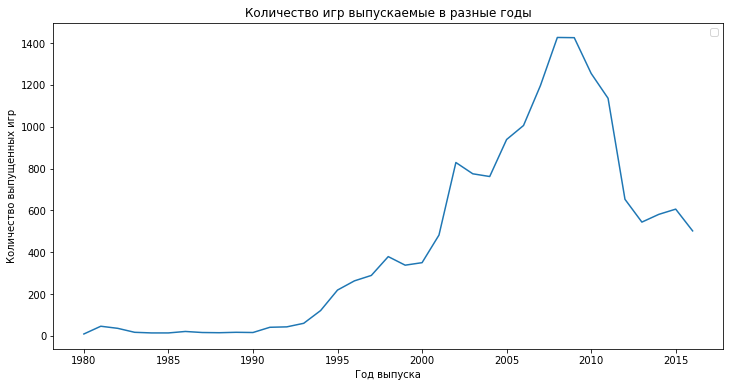

In [33]:
# Создадим линейный график, чтобы просмотреть как менялось количество выпускаемых игр
games_on_period = data_games.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(12,6))
sns.lineplot(data=games_on_period)
plt.title("Количество игр выпускаемые в разные годы")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend('')

- Слабое развитие игр с  1980 года по 2000.
- Активный рост с 2000 года до 2009.
- Явный пик в 2010 году. 
Логичные данные, изначально отсутствие развитых технологий и в итоге переход на мобильные игры и приложения.

Перейдем к продажам по платформам. Посмотрим общее кол-во и визуализируем данные

In [34]:
data_games.platform.value_counts()

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

Построим простую и четкую гистограму. Используем Seaborn и визуализируем данные по продажам и платформам с помощью функции sns.barplot(), которую и далее будем активно использовать

Text(0, 0.5, 'Количество продаж')

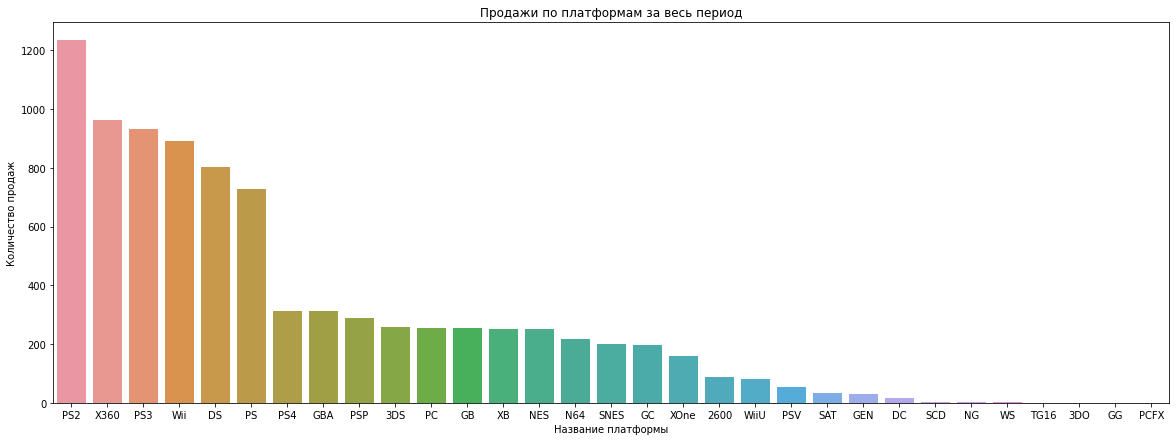

In [35]:
platform_on_sales = data_games.pivot_table(
    index='platform', values='general_sales', aggfunc='sum').sort_values(by='general_sales', ascending=False)

plt.figure(figsize=(20, 7))
sns.barplot(x=platform_on_sales.index,y=platform_on_sales['general_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Самые популярные платформы - PS2, X360, PS3, WII, DS, PS

У остальных платформ достаточно мало установок и кол-во продаж минимально. Посмотрим данные по продажам по годам по популярным. 

PS2


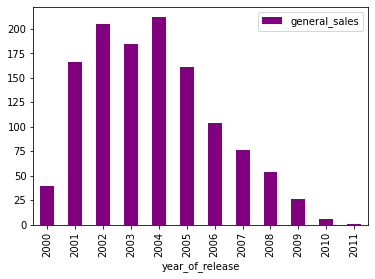

X360


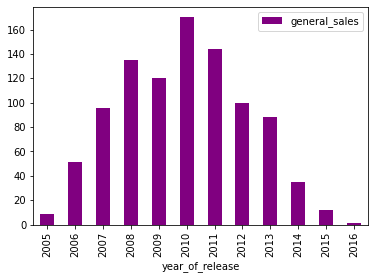

PS3


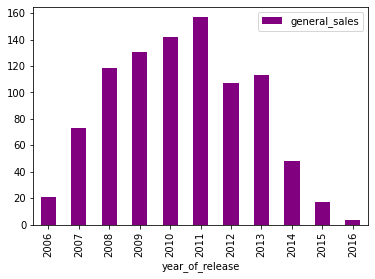

Wii


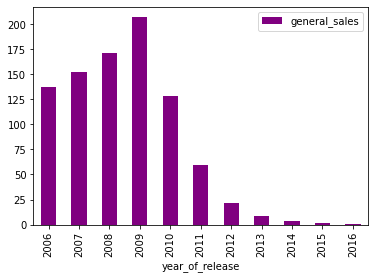

DS


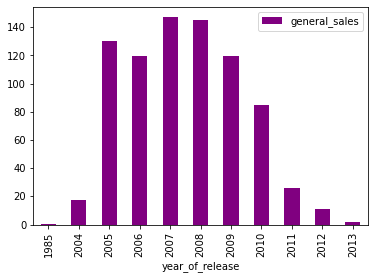

In [36]:
for platform in platform_on_sales.index[:5]:
    print(platform)
    (data_games
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='general_sales', aggfunc='sum')
     .plot(kind='bar', color = 'purple')
    )
    plt.show()

Исходя из динамики для просмотра средних данных и популярности, возьмем на этом шаге данные с 2000 года и эти 5 популярных платформ. Логичней по динамике взять с 2005, т.к. идут активные пики популярности платформ, но так наглядно пропадут данные по PS2. Так, посмотрим в целом как менялись продажи по годам.


In [37]:
# Создадим и посмотрим общую таблиццу по топу
top_5_platforms = data_games.pivot_table(index='platform', values='general_sales', aggfunc='sum').sort_values(by='general_sales', ascending=False).head(5)
top_5_platforms = top_5_platforms.reset_index().rename_axis(None, axis=1)
top_5_platforms.head()

,platform,general_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78


In [38]:
# Напишем функцию с данными с 2000 года
def year_total_sale_platform(name, data):
    actual = data[(data['platform'] == name) & (data['year_of_release'] > 2000)]
    total = actual.pivot_table(index='year_of_release', values='general_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total

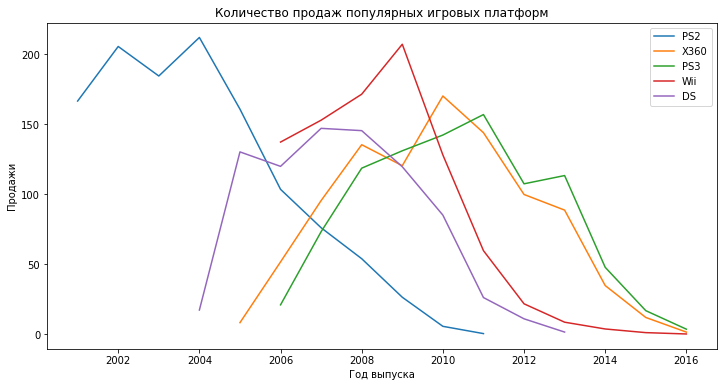

In [39]:
plt.figure(figsize=(12,6))
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')

for i in list(top_5_platforms['platform']):
    sns.lineplot(data=year_total_sale_platform(i,data_games)['general_sales'], label=i)
    plt.legend()

Наибольшее количество продаж было у игр для PS2.
PS2 (популярен в 2002-2004 годах). X360 (популярен в 2010-2011 годах). PS3 (популярен в 2008-2011 годах). Wii (популярен в 2006-2009 годах). DS (популярен в 2007-2008 годах). Остальные, исходя из объемов не рассматриваем.

Высокие продажи в среднем по платформам держатся 2-4 года. Срок появления новых платформ - 1-3 года. Пик по каждой платформе после запуска наступает в течение 4-5 лет.

Итак, для прогнозирования остановимся на данных с 2014 года. Т.е. за 3 года. Их и будем считать актуальными для этого анализа. Почему, потому что нам нужно учесть общую динамику существования платформ и их продаж с учетом пиков развития/падения и, однозначно, массовости данных, в связи с основными высокими темпами развития всех игровых платформ в принципе.

In [40]:
# Создадим общую таблицу с актуальным периодом
actual_games = data_games.query('year_of_release >= 2014').copy()
actual_games.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,Unknown,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,Unknown,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


Интересен Топ по этому периоду и все продажи

In [41]:
actual_platform_sales = actual_games.pivot_table(index='platform', values='general_sales', aggfunc='sum').sort_values(by='general_sales', ascending=False)

In [42]:
actual_platform_sales.head(20)

,general_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


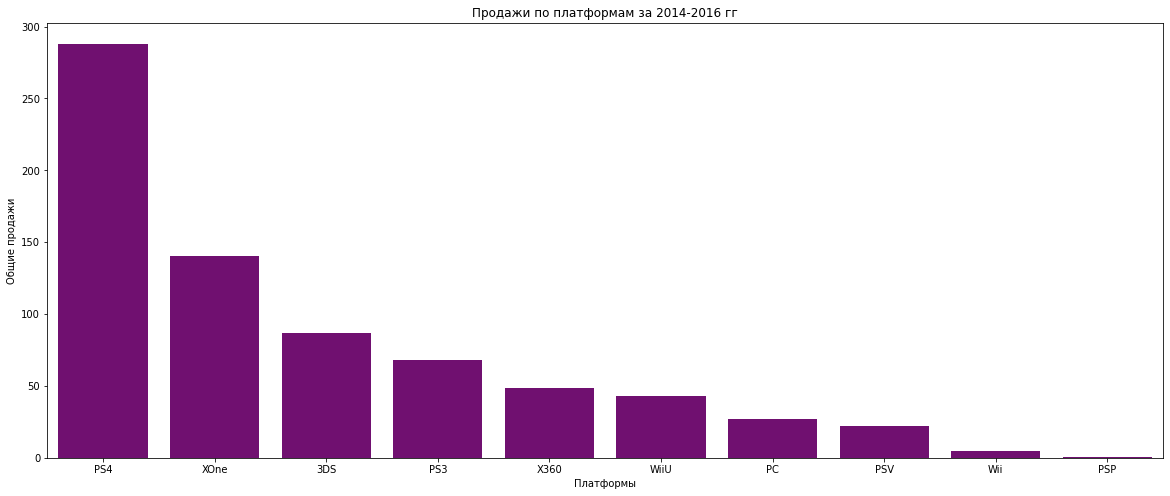

In [43]:
plt.figure(figsize=(20, 8))
(sns.barplot(data = actual_platform_sales, x = actual_platform_sales.index, y = 'general_sales', color = 'purple')
    .set(title = 'Продажи по платформам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()

Тут явно лидирует PS4. Далее, примерно в одном диапазоне продаж - PS3, XOne, 3DS, X360.

Построим графики по каждой платформе по годам и посмотрим их динамику

PS4


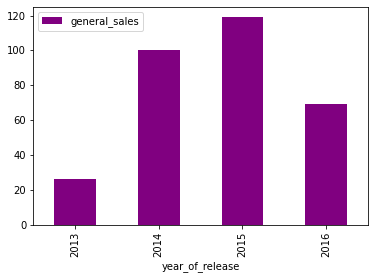

XOne


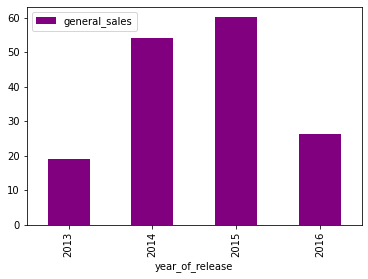

3DS


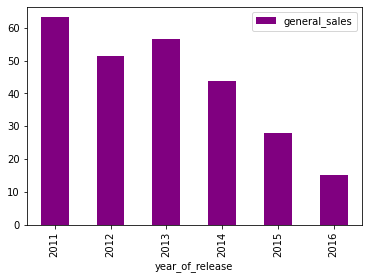

PS3


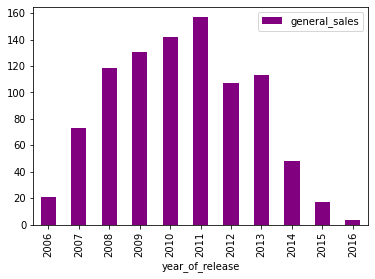

X360


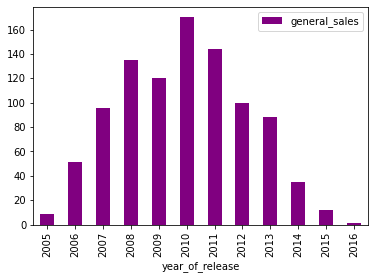

WiiU


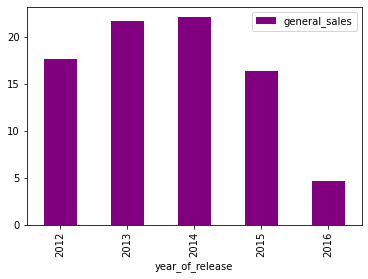

PC


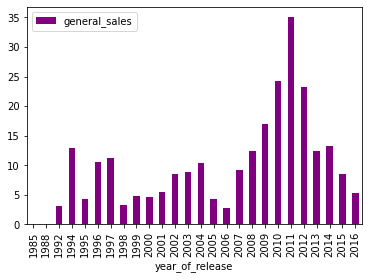

PSV


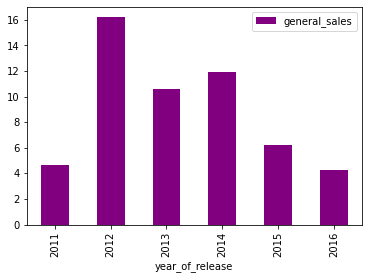

Wii


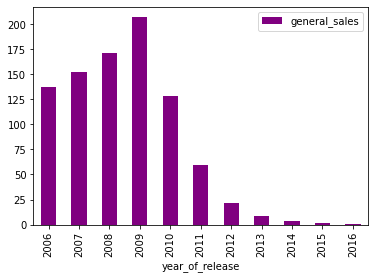

PSP


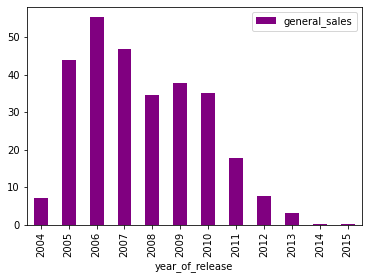

In [44]:
for platform in actual_platform_sales.index:
    print(platform)
    (data_games
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='general_sales', aggfunc='sum')
     .plot(kind='bar', color = 'purple')
    )
    plt.show()

Построим график «ящик с усами» по топу-5 актуальных продаж игр в разбивке по платформам

In [45]:
new_games_top = actual_games.query('platform not in ["Wii", "PSV", "PS", "PSP" "WiiU", "DS"]')

In [46]:
new_games_top.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Unknown,7.98


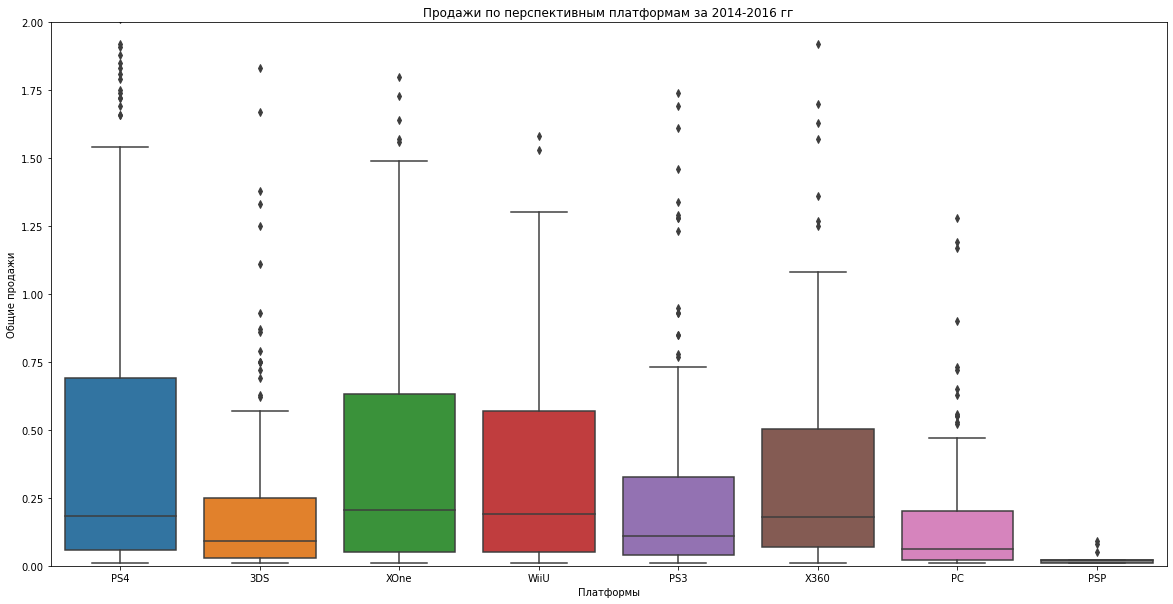

In [47]:
plt.figure(figsize=(20, 10))
(sns.boxplot(data = new_games_top, y = 'general_sales', x='platform')
    .set(title = 'Продажи по перспективным платформам за 2014-2016 гг', 
         xlabel = 'Платформы', 
         ylabel = 'Общие продажи',
         ylim=(0, 2)))
plt.show()

Слишком мало данных, прогнозированию не поможет. Распределение продаж и медиана примерно на примерно одном уровне. Видны конечно выбросы, значит есть перспективные игры на этих платформах.

Построим тогда по глобальным продажам за выбранный период

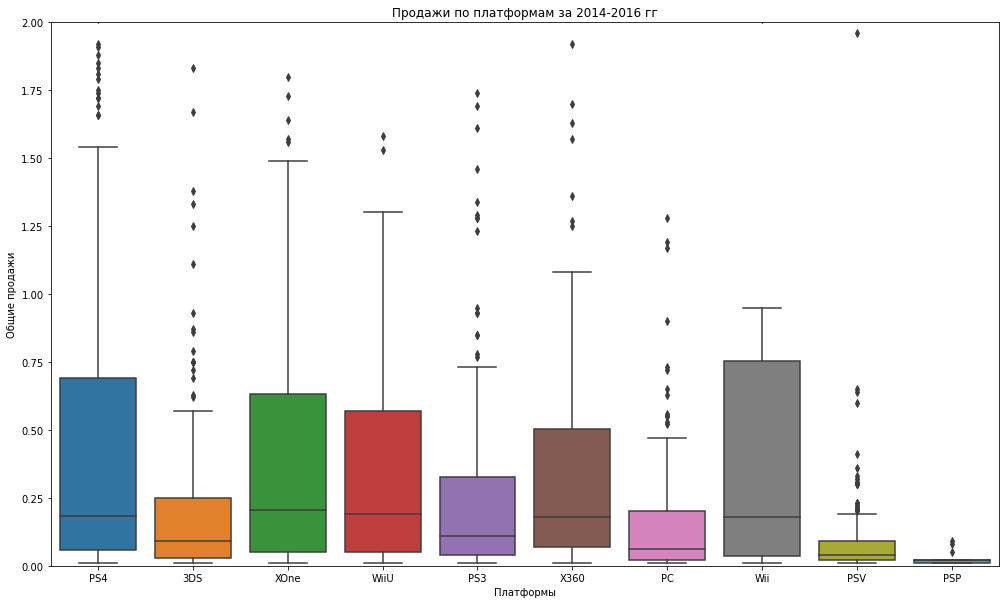

In [48]:
plt.figure(figsize=(17, 10))
(sns.boxplot(data = actual_games, y = 'general_sales', x='platform')
    .set(title = 'Продажи по платформам за 2014-2016 гг', 
         xlabel = 'Платформы', 
         ylabel = 'Общие продажи',
         ylim=(0, 2)))
plt.show()

Как перспективные по динамике (наш топа актуальных), в связке с их минимальным кол-вом продаж, их обозначать нельзя. Тут явно лидирующие с выделяющейся медианой - X360, PS4, XOne, Wii

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Отлично, что ты используешь библиотеку seaborn, а не стандартные инструменты matplotlob. Так "ящики с усами" получаются намного более репрезентативными.

Посмотрим график по годам по продажам за актуальный период

Text(0, 0.5, 'Продажи')

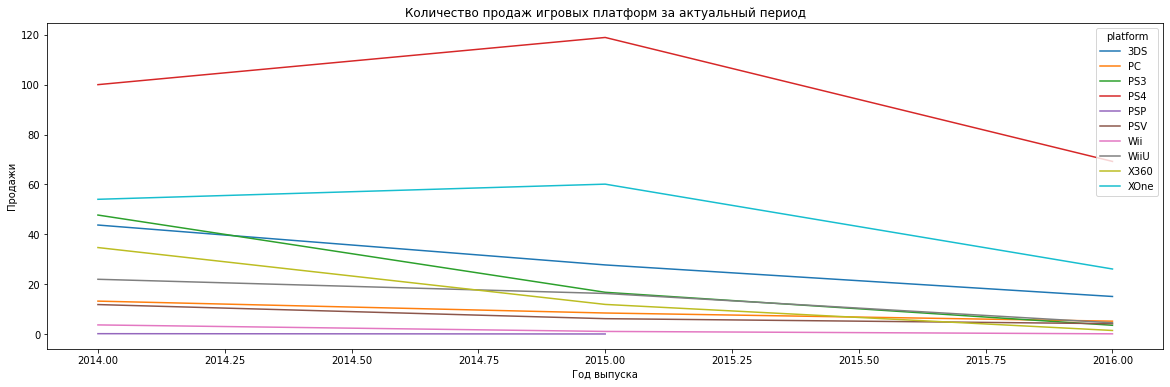

In [49]:
actual_games.pivot_table(index='year_of_release', columns = 'platform', values='general_sales', aggfunc='sum').plot(figsize=(20, 6))
plt.title('Количество продаж игровых платформ за актуальный период')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')

Итак, по всем платформам спад. PS4 является потенциально прибыльной, также PC, потому что видны продажи. падает сильнее всего спрос на консоли: X360, PS3. На остальные платформы спрос упал ранее. Т.е. за период падающие по продажам - X360, PS3 + Wii, PSP, DS. Явно растущих нет. PC, PS4, PSV, WiiU - растущие, есть надежда, плафтормы. Потенциально прибыльные в принципе для прогнозирования продаж и рекламы (Топ, перспективные) - PS4, XOne, PC.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами

In [50]:
PS2 = data_games.query('platform == "PS2"')

In [51]:
PS2_cor = PS2[['critic_score','user_score', 'general_sales']]
PS2_cor.corr()

,critic_score,user_score,general_sales
critic_score,1.000000,0.565841,0.392536
user_score,0.565841,1.000000,0.175055
general_sales,0.392536,0.175055,1.000000


<AxesSubplot:xlabel='user_score', ylabel='critic_score'>

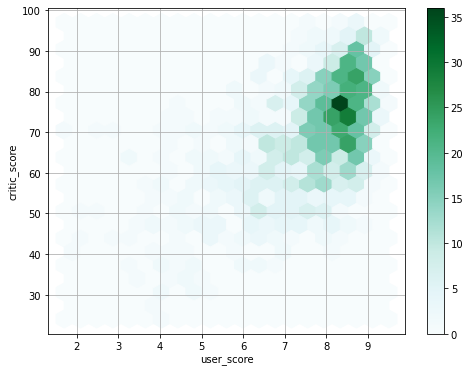

In [52]:
PS2 = data_games.query('platform == "PS2"')
PS2.plot(x='user_score', y='critic_score', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

Итак, корреляция между оценками пользователей и продажами практически нет. 
Оценки критиков немного, но влияют на продажи игр. Это видно по корреляции. Чем выше оценка критиков, тем больше происходит продаж.

Посмотрим актуальную в выбранный период PS4.

In [53]:
PS4 = data_games.query('platform == "PS4"')

In [54]:
PS4_cor = PS4[['critic_score','user_score', 'general_sales']]
PS4_cor.corr()

,critic_score,user_score,general_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
general_sales,0.406568,-0.031957,1.000000


<AxesSubplot:xlabel='user_score', ylabel='critic_score'>

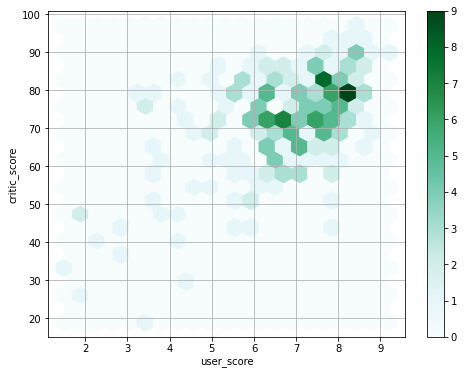

In [55]:
PS4 = data_games.query('platform == "PS4"')
PS4.plot(x='user_score', y='critic_score', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

И, XOne

In [56]:
XOne = data_games.query('platform == "XOne"')

In [57]:
XOne_cor = XOne[['critic_score','user_score', 'general_sales']]
XOne_cor.corr()

,critic_score,user_score,general_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
general_sales,0.416998,-0.068925,1.000000


<AxesSubplot:xlabel='user_score', ylabel='critic_score'>

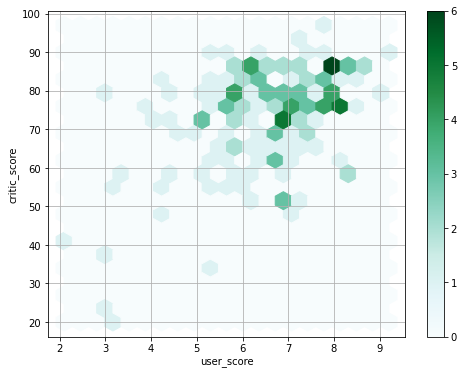

In [58]:
XOne = data_games.query('platform == "XOne"')
XOne.plot(x='user_score', y='critic_score', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

Таким образом, да, корреляция есть, но ее значение очень слабое. У популярной PS2 наиболее явные значения. И оценки пользователей и критиков влияют на продажи. В целом, оценка пользователей не значительно влияет на продажи. Покупатели прислушиваются больше к критикам, чем к оценкам других пользователей.

Посмотрим на общее распределение игр по жанрам

In [59]:
data_games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [60]:
platform_sales_genre = (
    data_games
    .pivot_table(index='genre', values='general_sales', aggfunc='sum')
    .sort_values('general_sales', ascending=False)
)
platform_sales_genre.head(15)

,general_sales
genre,
Action,1716.52
Sports,1309.67
Shooter,1041.36
Role-Playing,931.08
Platform,825.55
Misc,790.29
Racing,723.49
Fighting,442.66
Simulation,387.96


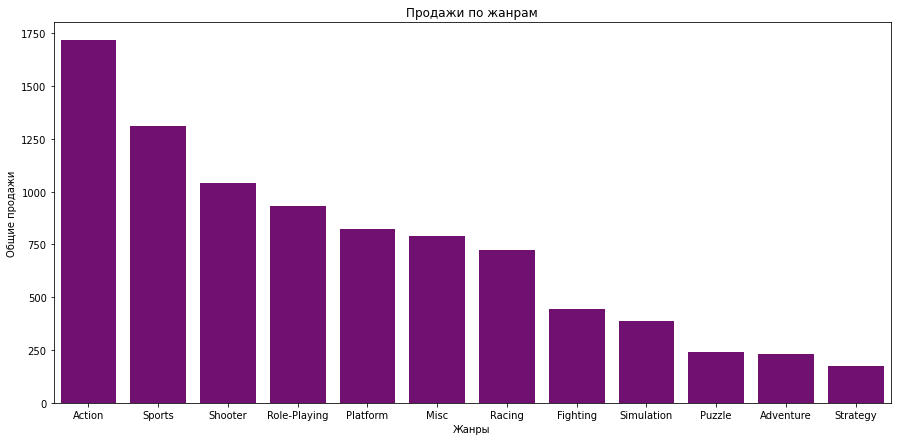

In [61]:
plt.figure(figsize=(15, 7))
(sns.barplot(data = platform_sales_genre, x = platform_sales_genre.index, y = 'general_sales', color = 'purple')
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи'))

plt.show()

Посмотрим медиану, т.к. нам нужны стабильные продажи с устойчивым спросом, возможно где-то основную прибыль принесла одна игра

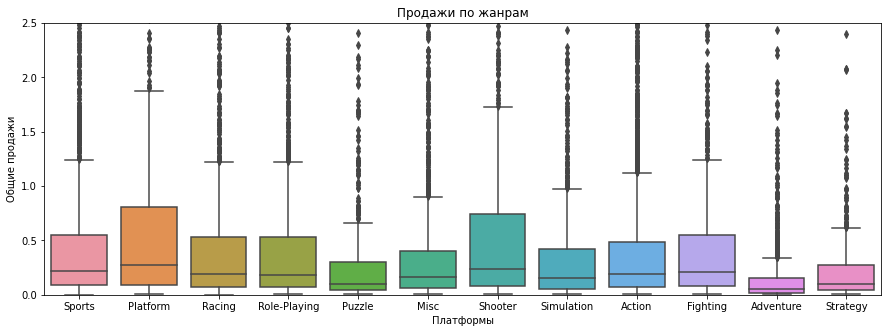

In [62]:
plt.figure(figsize=(15, 5))
(sns.boxplot(data = data_games, y = 'general_sales', x = 'genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 2.5)))

plt.show()

Таким образом, самые прибыльные жанры - Action, Sports, Shooter. В целом, по медианным значениям все стабильно, дополнительно, как подтверждение - Shooter, плюс Platform и Fighting. Наименее прибыльные жанры - Strategy, Puzzle.

Общий вывод.
-	Представленные данные явно свидетельствуют о слабом развитии игр с 1980 года по 2000. Активный рост проявляется с 2000 года до 2009. Явный пик в 2010 году. Поэтому для анализа данные за все годы нам нет смысла рассматривать.
-	Самые популярные платформы - PS2, X360, PS3, WII, DS, PS.
-	Наибольшее количество продаж было у игр для PS2. PS2 (популярен в 2002-2004 годах). X360 (популярен в 2010-2011 годах). PS3 (популярен в 2008-2011 годах). Wii (популярен в 2006-2009 годах). DS (популярен в 2007-2008 годах). 
-	Высокие продажи в среднем по платформам держатся 2-4 года. Срок появления новых платформ - 1-3 года. Пик по каждой платформе после запуска наступает в течение 4-5 лет.
-	Для прогнозирования взяли данные за 3 года, с 2014 года. Так как, индустрия изменчива и динамична и необходимы свежие данные. 
-	По данным за актуальный период лидирует по продажам PS4. Далее, среди лидеров - PS3, XOne, 3DS, X360. В целом, потенциально прибыльные для прогнозирования продаж и рекламы (Топ, перспективные) - PS4, XOne, PC.
-	У платформ наблюдается взаимосвязь между продажами, оценками критиков и пользователей. Корреляция между оценками пользователей и продажами не высокая. Оценки же критиков больше влияют на продажи игр - чем выше оценка критиков, тем больше продаж. В целом положительная корреляция наиболее заметна у популярной платформы за период с 2014 года PS4 (больше интереса, больше продаж).
-	Самыми прибыльными жанрами являются Action, Sports, Shooter. Наименее прибыльные жанры - Strategy, Puzzle.


## Составления портрета пользователя каждого региона

В данных 3 основных региона: Северная Америка, Европа и Япония. Выделим основные платформы продаж по регионам

Итак, изначально, для нагладности выведем топ по каждому региону и построим гистограммы (возьмем весь период)

Продажи по платформам в Северной Америке:

In [63]:
na_sales_platforms = data_games.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
na_sales_platforms.head(5)

,na_sales
platform,
X360,595.74
PS2,572.92
Wii,486.87
PS3,390.13
DS,380.31


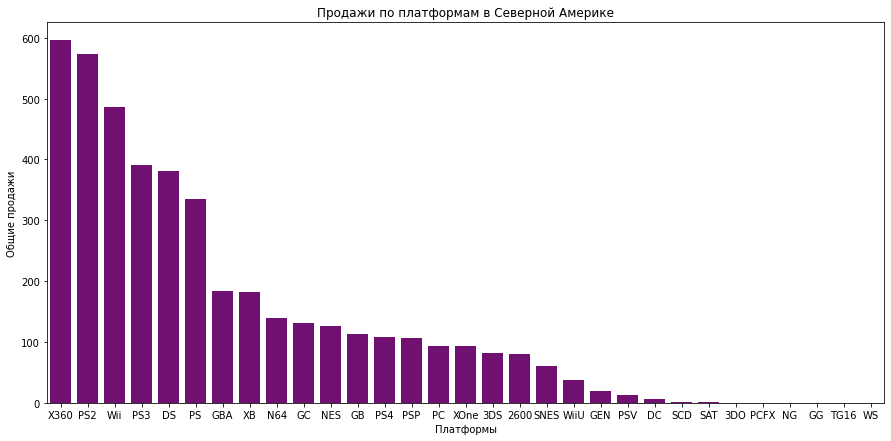

In [64]:
plt.figure(figsize=(15, 7))
(sns.barplot(data = na_sales_platforms, x = na_sales_platforms.index, y = 'na_sales', color = 'purple')
    .set(title = 'Продажи по платформам в Северной Америке', xlabel = 'Платформы', ylabel = 'Общие продажи'))

plt.show()

Продажи по платформам в Европе:

In [65]:
eu_sales_platforms = data_games.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
eu_sales_platforms.head(5)

,eu_sales
platform,
PS2,332.63
PS3,327.21
X360,268.32
Wii,258.32
PS,212.39


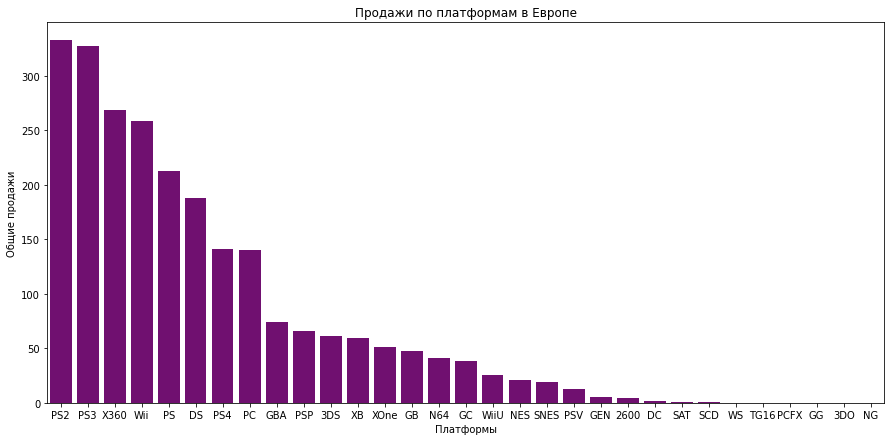

In [66]:
plt.figure(figsize=(15, 7))
(sns.barplot(data = eu_sales_platforms, x = eu_sales_platforms.index, y = 'eu_sales', color = 'purple')
    .set(title = 'Продажи по платформам в Европе', xlabel = 'Платформы', ylabel = 'Общие продажи'))

plt.show()

Продажи по платформам в Японии:

In [67]:
jp_sales_platforms = data_games.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp_sales_platforms.head(5)

,jp_sales
platform,
DS,175.02
PS,139.78
PS2,137.54
SNES,116.55
3DS,100.62


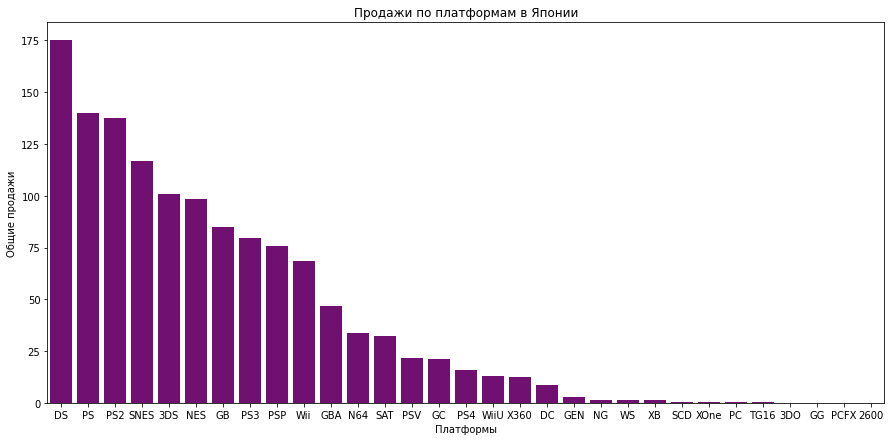

In [68]:
plt.figure(figsize=(15, 7))
(sns.barplot(data = jp_sales_platforms, x = jp_sales_platforms.index, y = 'jp_sales', color = 'purple')
    .set(title = 'Продажи по платформам в Японии', xlabel = 'Платформы', ylabel = 'Общие продажи'))

plt.show()

Порстроим круговые диаграммы, чтобы наглядно изучить доли по топам в регионах

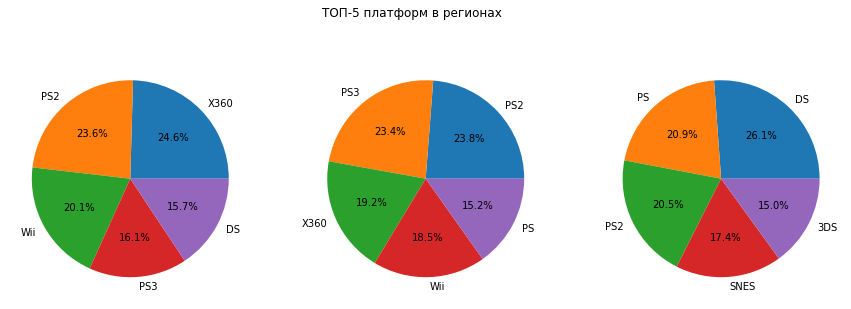

In [69]:
# Выделим список регионов
region = data_games.columns[4:7]
# Зададим параметры круговой диаграммы для регионов
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 платформ в регионах')
for i in range(3):
  df_i = (data_games.groupby('platform')[region[i]].sum().
             reset_index().
             sort_values(region[i], ascending = False).
             head(5))
  axs[i].pie(df_i[region[i]], labels = df_i['platform'], autopct='%1.1f%%')
plt.show()

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Отлично, что ты пользуешься методом subplots! Кстати, не стоит забывать о двухуровневых заголовках (в данном случае - о одном заголовках для каждой диаграмы в отдельности, помимо общего).

Топы, в целом, в долях распределены равномерно, присутствуют во всех регионах. В лидерах:
- Северная Америка (X360, PS2, Wii, PS3, DS)
- Европа (PS2, PS3, X360, PS, Wii) 
- Япония (DS, PS, PS2, SNES, 3DS)

Отличий по Америке и Европе нет практически, отличаются 1 платформой.
Япония несколько отличается. В ее топах присутствуют платформы DS и 3DS.

Интересна доля и данные за актуальный период. Для этого построим круговые диаграммы

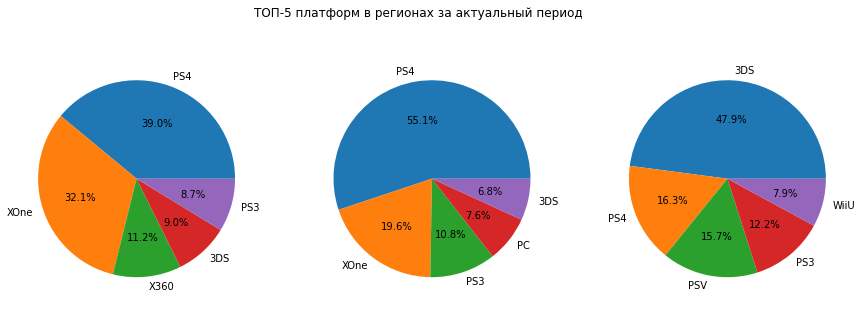

In [70]:
region_actual_games = actual_games.columns[4:7]
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 платформ в регионах за актуальный период')
for i in range(3):
  # 5 самых продающих платформ
  df_i = (actual_games.groupby('platform')[region_actual_games[i]].sum().
             reset_index().
             sort_values(region_actual_games[i], ascending = False).
             head(5))
  axs[i].pie(df_i[region_actual_games[i]], labels = df_i['platform'], autopct='%1.1f%%')
plt.show()

Полученные данные изменились. В регионах появляется на лидирующих позициях - PS4 (топ в Европе). Сходство сохраняется в Северной Америке и Европе. Япония опять же отличается - на первом месте 3DS. Связь можно установить в портативности устройств с платформой и развитостью с активной деятельностью японского населения.

Для составления портрета нужны данные по популярным жанрам. Аналогично платформам, выведем топ и визуализируем данные в долях в круговых диаграммах 

In [71]:
na_sales_genre = data_games.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
na_sales_genre.head(5)

,na_sales
genre,
Action,863.17
Sports,671.20
Shooter,584.83
Platform,444.44
Misc,399.57


In [72]:
eu_sales_genre = data_games.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
eu_sales_genre.head(5)

,eu_sales
genre,
Action,510.99
Sports,371.33
Shooter,314.52
Racing,234.49
Misc,210.60


In [73]:
jp_sales_genre = data_games.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp_sales_genre.head(5)

,jp_sales
genre,
Role-Playing,353.39
Action,160.14
Sports,134.93
Platform,130.71
Misc,107.02


Топы и цифры за общий период по регионам определили. В целом, разброса по жанрам нет. Топ 5 жанров по регионов за все время
в Северной Америке и Европе почти одинаковы (Action, Sports, Shooter, Platform, Misc - Америка, Action, Sports, Shooter, Racing, Misc - Европа). По Японии похожие данные, но на первом месте - Role-Playing, далее - Action, Sports, Platform, Misc.

Визуализируем на диаграммах

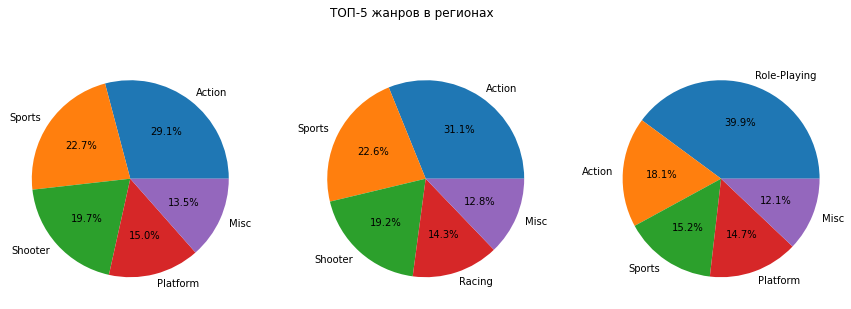

In [74]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(3):
  # 5 самых продающих жанров
  df_i = (data_games.groupby('genre')[region[i]].sum().
             reset_index().
             sort_values(region[i], ascending = False).
             head(5))
  axs[i].pie(df_i[region[i]], labels = df_i['genre'], autopct='%1.1f%%')
plt.show()

Важно понять и как изменился топ и распределение по жанрам в регионах в актуальный период.

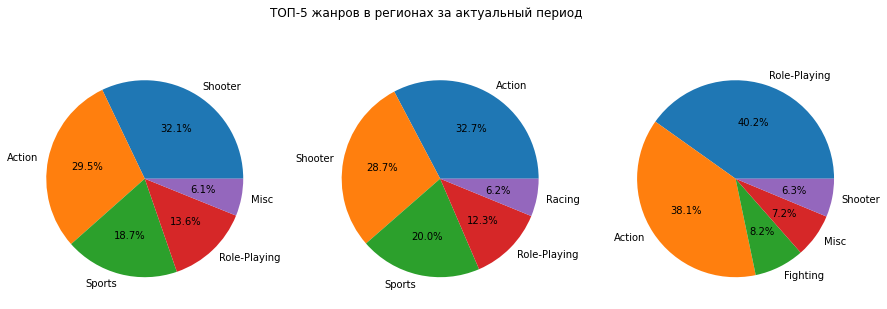

In [75]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах за актуальный период')
for i in range(3):
  df_i = (actual_games.groupby('genre')[region_actual_games[i]].sum().
             reset_index().
             sort_values(region_actual_games[i], ascending = False).
             head(5))
  axs[i].pie(df_i[region_actual_games[i]], labels = df_i['genre'], autopct='%1.1f%%')
plt.show()

Данные по популярным платформам меняются со временем. В Америке и Европе в актуальном топе появляется – PS4. В Японии на первом месте уже с большей долей - 3DS.

Далее изучим вопрос влияния рейтинга ESRB на продажи в отдельном регионе

На этом шаге составим общую таблицу по рейтингу и регионам

In [76]:
ESRB_games = data_games.pivot_table(index = 'rating', values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum')
ESRB_games

,eu_sales,jp_sales,na_sales
rating,,,
E,704.14,199.42,1276.80
E10+,183.35,40.20,345.50
EC,0.11,0.00,1.53
M,480.61,63.58,744.15
T,421.79,150.70,747.60
Unknown,609.68,836.74,1225.84


In [77]:
ESRB_actual_games = actual_games.pivot_table(index = 'rating', values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum')
ESRB_actual_games

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95
Unknown,58.95,56.90,64.72


Вспомним, что:
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»

Распределение среди рейтингов примерно одинаковое. По рейтингам видно, что больше всего продаж у игр с рейтингом «Для всех». А в актуальном периоде уже лидируют игры с рейтингом  М - «Для взрослых».

Общий вывод.
В данных 3 основных региона: Северная Америка, Европа и Япония. 

Изучив данные по платформам, жанрам и рейтингу можно сделать следующие выводы по пользователям в отдельных регионах:
1. Северная Америка:
- Топ платформ: X360, PS2, Wii, PS3, DS.
- Топ жанров: Action, Sports, Shooter, Platform, Misc.
- ESRB рейтинг: «Для всех», «Подросткам», «Для взрослых», «Для всех от 10 лет и старше», «Для детей младшего возраста»  
2. Европа:
- Топ платформ: PS2, PS3, X360, PS, Wii.
- Топ жанров: Action, Sports, Shooter, Racing, Misc.
- ESRB рейтинг: «Для всех», «Подросткам», «Для взрослых», «Для всех от 10 лет и старше», «Для детей младшего возраста»
3. Япония:
- Топ платформ: DS, PS, PS2, SNES, 3DS.
- Топ жанров: Role-Playing, Action, Sports, Platform, Misc.
- ESRB рейтинг: «Для всех», «Подросткам», «Для взрослых», «Для всех от 10 лет и старше».

В целом доли по топам платформ равномерны за весь период. Предпочтения пользователей в Америке и Европе похожи. Япония отличается от двух первых регионов. Данные по популярным платформам меняются со временем. В Америке и Европе в актуальном топе появляется – PS4. В Японии на первом месте уже с большей долей - 3DS. 
По жанрам в актуальном периоде развивается во всех регионах, а особенно в Японии, жанр Role-Playing. Связь можно установить в портативности устройств с платформой и развитостью с активной деятельностью японского населения. 
Распределение среди рейтингов примерно одинаковое. По рейтингам видно, что больше всего продаж у игр с рейтингом «Для всех». А в актуальном периоде уже лидируют игры с рейтингом  М - «Для взрослых». 

## Проверка гипотез

Проверим две гипотезы:
- Гипотеза о средних пользовательских рейтингах платформ Xbox One и PC.
- Гипотеза о средних пользовательских рейтингах жанров Action и Sports.

<div class="alert alert-info">
Для проверки как первой, так и второй гипотезы у нас есть данные по пользовательским рейтингам различных платформ и жанров. Т.е. в каждом из случаев нам нужно сравнить средние арифметические двух групп - сравнить средние двух генеральных совокупностей между собой. Данные по совокупностям независимы, распределены (приблизительно) нормально. В данном случае будем использовать статистический тест для сравнения этих средних арифметических из групп - T-критерий Стюдента (T-Test, T-критерий) методом scipy.stats.ttest_ind (array1, array2, equal_var). 

Считаем верным, что гипотеза о средние пользовательских рейтингов платформ Xbox One и PC одинаковы, как и средний рейтинг жанров Action и Sports, их обозначаем как нулевые гипотезы. Альтернативными, обозначили гипотезы, которые противоречат нашей нулевой гипотезе и, действительно, могут быть приняты. Однозначно, выборки разного размера, можно предположить, что дисперсии у генеральных совокупностей разные. Найдем средние показатели и значение p-value. Установим уровень значимости средний, в 5%. с большей долей вероятности ошибок быть не должно.

Гипотеза о средних пользовательских рейтингах платформ Xbox One и PC:
- Нулевая гипотеза (H0): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Альтерантивная гипотеза (H1): Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Проверим за актуальный период, без учета пропусков.

In [78]:
# заполним значением -5, и не будем учитывать в проверке
actual_games['user_score'] = actual_games['user_score'].fillna('-5')
actual_games.user_score.value_counts()

-5     801
7.1     40
6.8     36
7.8     33
8.0     31
      ... 
0.2      1
1.7      1
2.3      1
9.1      1
2.1      1
Name: user_score, Length: 80, dtype: int64

In [79]:
actual_games['user_score'] = actual_games['user_score'].astype('float')

In [80]:
# создадим две переменные по платформам и выведем среднее
XOne = actual_games[(actual_games['platform'] == 'XOne') &  (actual_games['user_score'] != -5)]['user_score']
PC = actual_games[(actual_games['platform'] == 'PC') &  (actual_games['user_score'] != -5)]['user_score']
print('Средний пользовательский рейтинг платформы Xbox One:', XOne.mean())
print('Средний пользовательский рейтинг платформы PC', PC.mean())

Средний пользовательский рейтинг платформы Xbox One: 6.594545454545456
Средний пользовательский рейтинг платформы PC 6.298360655737705


In [81]:
# проверим гипотезу методом st.ttest_ind() о равенстве средних двух генеральных совокупностей

results = st.ttest_ind(XOne, PC, equal_var=False)

alpha = .05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Вывод, да нулевая гипотеза не отвергнута. Рейтинги платформ XOne и PC значительно не отличаются. Вероятность случайно получить такое или большее различие равно почти 55%, хотя средние рейтинги и не одинаковы. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между этими рейтингами.

Проверим вторую гипотезу - гипотезу о средних пользовательских рейтингах жанров Action и Sports:
- H0: средний пользовательский рейтинг жанров Action и Sports одинаковые
- H1: средний пользовательский рейтинг жанров Action и Sports разные

In [82]:
# создадим две переменные по платформам и выведем среднее
Action = actual_games[(actual_games['genre'] == 'Action') &  (actual_games['user_score'] != 'Unknown')]['user_score']
Sports = actual_games[(actual_games['genre'] == 'Sports')&  (actual_games['user_score'] != 'Unknown')]['user_score']
print('Средний пользовательский рейтинг жанров Action:', Action.mean())
print('Средний пользовательский рейтинг жанров Sports:', Sports.mean())

Средний пользовательский рейтинг жанров Action: 0.6428109854604201
Средний пользовательский рейтинг жанров Sports: 3.0658385093167704


In [83]:
# проверим гипотезу методом st.ttest_ind() о равенстве средних двух генеральных совокупностей

results = st.ttest_ind(Action, Sports, equal_var=False)

alpha = .05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.29097718020363e-08
Отвергаем нулевую гипотезу


Вывод.
В итоге изучения данных о продажах игр, оценок пользователей и экспертов, жанров и платформ, можно выявить некоторые закономерности, определяющие успешность игры.
- Однозначно, немаловажное значение имеет платформа, на которой выпущена, либо будет выпущена игра. Преимущество у игр, выпущенных на перспективных платформах (срок появления новых платформ и затухания старых – короткий). Перспективные – это популярность продаж за последний актуальный промежуток времени + недавно появившиеся, обновленные и широко распространённые в различных регионах платформы.
- Важно понимать и жанры игр, на которые стоит обращать внимание при продвижении продукта на рынках в разных регионах, так как отличия по предпочтениям заметны в ходе анализа. Так, например, нужны продажи в Европе и Америке - выбираем игры в жанре Action, Shooter, Sports, в Японии - Role-Playing.
- Рейтинг ESRB по возрастным категориям также влияет на продажи по отдельном регионе. Сейчас распространены/больше всего продаж у игр с рейтингом «Для всех»
- Рейтинг критиков, пусть и незначительно, но влияет на продажи. Для составления планов по продвижению это можно учесть и сделать акцент на играх на тех же платформах после успешного релиза.

По проекту:

Первые игры появились ещё в 1980 году.  Слабое до 2000 года. Активный рост с 2000 года до 2009. С каждым годом кол-во продаж и выпускаемых игр увеличивается.

Лидеры продаж по платформам меняются. Если раньше лидером по продажам был PS2, то сейчас на лидирующей строчке оказалась PS4.
Перспективные платформы: PS4, XOne, PS.

Высокие продажи в среднем по платформам держатся 2-4 года. Срок появления новых платформ - 1-3 года. Пик по каждой платформе после запуска наступает в течение 4-5 лет.

Для прогнозирования взяли данные за 5 лет, с 2012 года. Так как, нужно учесть общую динамику существования платформ и их продаж с учетом пиков развития/падения и, однозначно, массовости и качества данных.

Пользователи из Северной Америки и Европы имеют похожие предпочтения по платформам и жанрам игр, в Японии больше любят Role-Playing игры и DS.

Не отвергаем гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Отвергаем гипотезу, что средние пользовательские рейтинги жанров Action и Sports одинаковые. 
